In [2]:
# Preliminaries (https://github.com/deeplizard/Keras_Jupyter_Notebooks/blob/master/CNN.ipynb)

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import layers
from keras import models
import itertools
% matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Create variables for path
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

# Need to augment with hue and other ways (crop, skew, rotate)

In [9]:
# Create batches
# Strongly consider setting up an alias for ImageDataGenerator with better presets
datagen = ImageDataGenerator(
    rotation_range = 70, 
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    rescale = 1.0/255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True, 
    fill_mode = 'nearest')

# consider adding zca_whitening = True
train_batch = datagen.flow_from_directory(train_path, target_size = (256, 256), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 32)

valid_batch = ImageDataGenerator().flow_from_directory(valid_path, target_size = (256, 256), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 8)
test_batch = ImageDataGenerator().flow_from_directory(test_path, target_size = (256, 256), classes = ['areolata', 'helicta', 'francisii', 'mitchellii'], batch_size = 4)

Found 382 images belonging to 4 classes.
Found 62 images belonging to 4 classes.
Found 34 images belonging to 4 classes.


In [10]:
imgs, labels = next(train_batch) # randomly select batch_size images - requires pillow==5.0

In [11]:
# plots 10 images with labels
def plots(ims, figsize = (12, 6), rows = 2, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

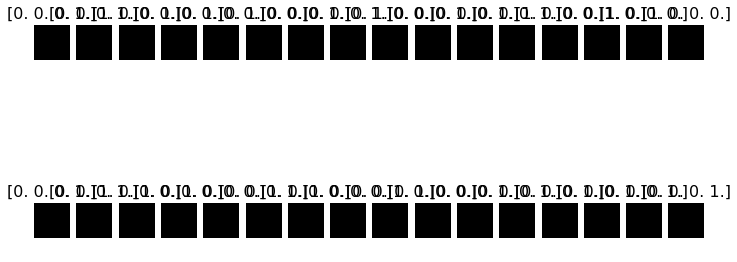

In [12]:
plots(imgs, titles = labels) 

In [28]:
# Now to model
model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape = (256, 256, 3)),
        Conv2D(8, (3, 3), activation='relu', input_shape = (256, 256, 3)),
        Flatten(),
        Dense(4, activation = 'softmax'),
    ])

In [29]:
model.compile(Adam(lr = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 252, 252, 8)       1160      
_________________________________________________________________
flatten_8 (Flatten)          (None, 508032)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 2032132   
Total params: 2,033,740
Trainable params: 2,033,740
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit_generator(train_batch, 
                    steps_per_epoch = 13, 
                    validation_data = valid_batch, 
                    validation_steps = 8, 
                    epochs = 5, 
                    verbose = 2)

Epoch 1/5
 - 75s - loss: 7.7062 - acc: 0.4971 - val_loss: 10.1388 - val_acc: 0.3710
Epoch 2/5
 - 62s - loss: 7.4996 - acc: 0.5347 - val_loss: 10.1388 - val_acc: 0.3710
Epoch 3/5
 - 62s - loss: 7.5938 - acc: 0.5289 - val_loss: 10.1388 - val_acc: 0.3710
Epoch 4/5
 - 62s - loss: 8.0590 - acc: 0.5000 - val_loss: 10.1388 - val_acc: 0.3710
Epoch 5/5
 - 63s - loss: 7.3130 - acc: 0.5463 - val_loss: 10.1388 - val_acc: 0.3710


In [ ]:
# A different 

In [34]:
# another formulation
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
flatten_10 (Flatten)         (None, 984064)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 7872520   
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
Total para

In [37]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [38]:
model.fit_generator(train_batch, 
                    steps_per_epoch = 13, 
                    validation_data = valid_batch, 
                    validation_steps = 8, 
                    epochs = 5, 
                    verbose = 2)

Epoch 1/5
 - 90s - loss: 11.4244 - acc: 0.2885 - val_loss: 11.4386 - val_acc: 0.2903
Epoch 2/5
 - 88s - loss: 11.3524 - acc: 0.2957 - val_loss: 11.4386 - val_acc: 0.2903
Epoch 3/5
 - 99s - loss: 11.5521 - acc: 0.2833 - val_loss: 11.4386 - val_acc: 0.2903
Epoch 4/5
 - 98s - loss: 11.0966 - acc: 0.3115 - val_loss: 11.4386 - val_acc: 0.2903
Epoch 5/5
 - 93s - loss: 11.3763 - acc: 0.2942 - val_loss: 11.4386 - val_acc: 0.2903
